<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_1/MLP_lec_1_Introductory_notes_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lecture 1: What is Machine Learning and how is it related to Physics? 
======

## Preliminaries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 3 )
plt.rc('lines', linewidth = 3 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

# Simple ML problem
What do you think "Machine Learning (ML)" is?


Imagine you have a mass attached to a spring and you displace the object and record the force required for displacement and the corresponding displacement. 
Now, there could be two things you are interested in
* How much force do I need for a specific displacement, if I haven't already tried that?
* What's the spring constant?

This reflects on the two distinct approaches. Here we are mostly concerned with the first question, namely the ability to predict rather than understanding, but not always. 


### Ideal case: Simple data and simple model
We start with some synthetic data with no noise.


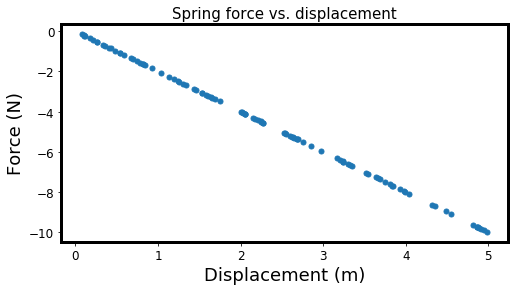

In [0]:
def spring_F(k, n_samples=100,x_max = 5):
    x_list = np.random.uniform(0,x_max,n_samples)
    return x_list.reshape(n_samples,1) , -k*np.abs( x_list ).reshape(n_samples,1)

x_list , spring_force_list = spring_F(2,)
x_label = 'Displacement (m)'
y_label = 'Force (N)'
plt_title = 'Spring force vs. displacement'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(x_list , spring_force_list)
plt.show()
# plt.close()

### Training an agent to estimate the force
Let's assume that we don't know where and how this data is generated/collected and want to find the model that estimates the force. 

In [0]:
def loss(y_list, x_list, w_list, bias=0):
    n_sample = len(y_list)
    y_list = y_list.reshape(n_sample,1)
    x_list = x_list.reshape(n_sample,1)
#     print(y_list.shape, x_list.shape)
    f_list =  ( np.dot(x_list, w_list ) + bias ).reshape( len(y_list)  , 1 )
    return np.sqrt( np.sum(  ( y_list - f_list )**2 )   )/n_sample


def simplified_loss(w, b=0):
    return loss(spring_force_list , x_list, w, b)

In [0]:
loss(spring_force_list, x_list, [1],0)

0.8143729098182314

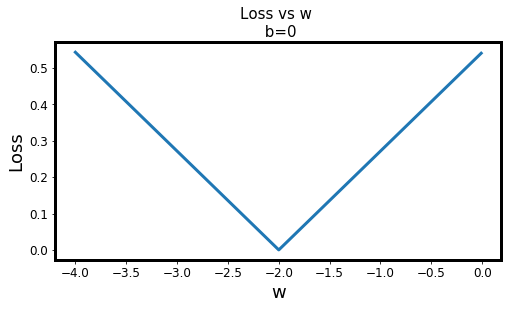

In [0]:
w_axis = np.arange(-4,0, .01)
losses = [simplified_loss(w, b=0) for w in w_axis]

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='w', ylabel='Loss', title='Loss vs w \n b=0')
ax.plot(w_axis, losses)

plt.show()

In [0]:
from scipy.optimize import minimize

In [0]:
min_w = minimize( (lambda w: loss(spring_force_list, x_list, [w[0]],w[1] )),[.1,.1])

In [0]:
print(min_w.x)
print(simplified_loss([min_w.x[0] ],min_w.x[1]) )

[-2.00000001e+00  3.01433795e-08]
1.5950860957134242e-09


### Using sklearn

In [0]:
from sklearn.linear_model import LinearRegression

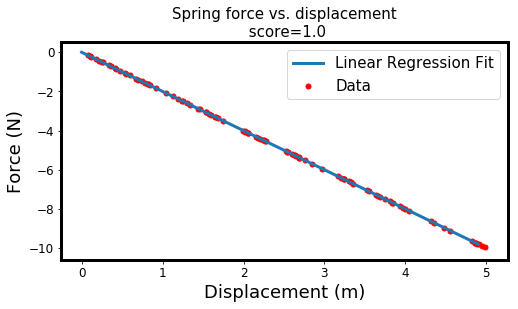

In [0]:
reg = LinearRegression()
reg.fit(x_list, spring_force_list)
x = np.arange(0,5,.1).reshape(50,1)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title + 
                     '\n score=' + str( reg.score(x_list, spring_force_list) ) )

ax.plot(x, reg.predict( x ) ,label='Linear Regression Fit' )
ax.scatter(x_list , spring_force_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()


## Realistic case: Let's see how the actual data would look like. 


In [0]:
'''This data is taken from lab report of students in Phys_Lab 3.'''

import io, requests

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Lec_1/Spring.csv'
s=requests.get(url).content
exp_data=pd.read_csv(io.StringIO(s.decode('utf-8')))


exp_data

,Displacement,Force
0,11.5,0.0
1,14.7,0.1
2,18.0,0.2
3,21.3,0.3
4,24.5,0.4
5,27.6,0.5


### Learning


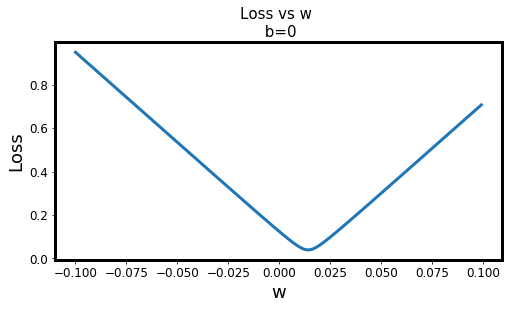

In [0]:
exp_w_axis = np.arange(-.1,.1, .001)
exp_losses = [loss(exp_data['Force'].values, exp_data['Displacement'].values, w,bias=0 ) for w in exp_w_axis]

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='w', ylabel='Loss', title='Loss vs w \n b=0')
ax.plot(exp_w_axis, exp_losses)

plt.show()

In [0]:
'''
Exercise
Do your own code for finding the fit. 

Define the cost function
Minimize it
Find the w that gives the minimum values of the loss. 
'''

exp_min_w = minimize((lambda w: loss(exp_data['Force'].values, exp_data['Displacement'].values, [w[0]],w[1] )),[.1,.1])
print(exp_min_w.x)
print(loss(exp_data['Force'].values, exp_data['Displacement'].values,[exp_min_w.x[0] ],exp_min_w.x[1]) )

[ 0.03091535 -0.35594099]
0.0007182370023726758


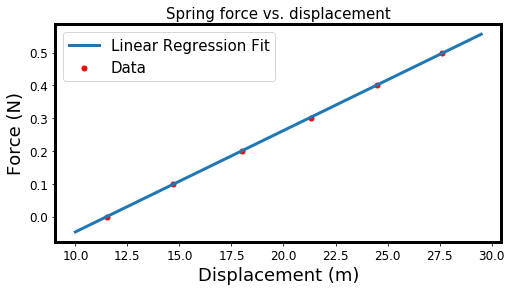

In [0]:
exp_reg = LinearRegression()
exp_reg.fit(exp_data['Displacement'].values.reshape(len(exp_data),1), exp_data['Force'])
exp_x = np.arange(10,30,.5).reshape(40,1)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot( exp_x , exp_reg.predict( exp_x ) ,label='Linear Regression Fit' )
ax.scatter(exp_data.Displacement , exp_data.Force, color='r',label='Data' )
ax.legend(loc=0)
plt.show()


# Complexity

Can't we just do what we used to do? Just find the cause and effect relation and establish the laws that governs the physics?

The challenge is that it is usually not this simple to establish the connection between the quantity of interest and parameters that define the problem. For instance, we could have

- Complex non-linearities in the problem
- Too many parameters involved


## Non-linearity 

### A little bit of non-linearity
What if the data is not at simple as we saw above. What happens then?
Here simulate the position of a particle under acceleration with some initial velocity and some initial position and collect the data of the x(t). 


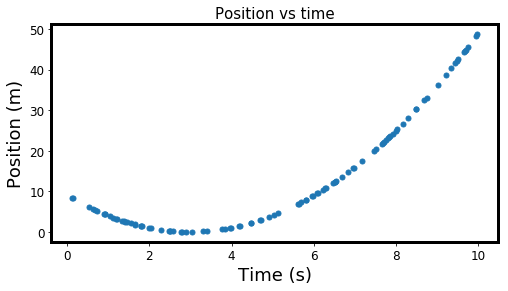

In [0]:
def position(a, v=0, x0=0, n_samples=100, t_max=5):
    t_list = np.random.uniform(0,t_max,n_samples)
    return t_list.reshape(n_samples,1) , (1/2*a*t_list**2 + v*t_list+x0).reshape(n_samples,1)

t_list , pos_list = position(2,v=-6,x0=9, t_max=10)
x_label = 'Time (s)'
y_label = 'Position (m)'
plt_title = 'Position vs time'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(t_list , pos_list)
plt.show()

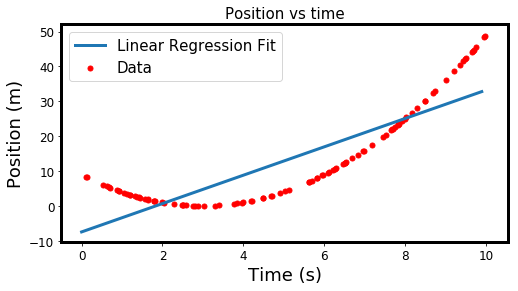

In [0]:
reg_nl = LinearRegression()
reg_nl.fit(t_list, pos_list)
x = np.arange(0,10,.1).reshape(100,1)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.scatter(t_list , pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

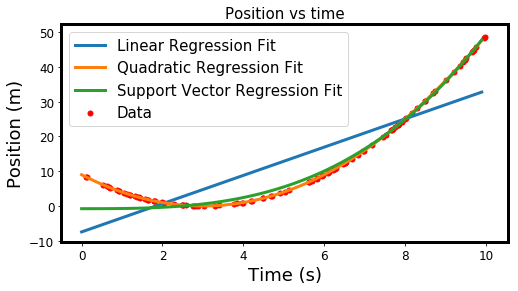

CPU times: user 9.7 s, sys: 12 ms, total: 9.71 s
Wall time: 9.54 s


In [0]:
%%time
reg_nl = LinearRegression()
reg_nl.fit(t_list, pos_list)
x = np.arange(0,10,.1).reshape(100,1)
n_s = len(t_list)

reg_nl2 = LinearRegression()
reg_nl2.fit(         np.hstack([t_list, t_list**2])      , pos_list)

from sklearn.svm import SVR
svr_nl = SVR(kernel='poly')
svr_nl.fit(t_list, pos_list.reshape(n_s, ) )

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg_nl2.predict( np.hstack([x,x**2]) ) ,label='Quadratic Regression Fit' )
ax.plot(x, svr_nl.predict( x ) ,label='Support Vector Regression Fit' )
ax.scatter(t_list , pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

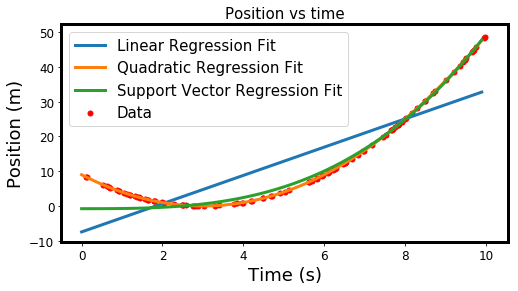

CPU times: user 9.36 s, sys: 32 ms, total: 9.4 s
Wall time: 9.3 s


In [0]:
%%time

reg_nl = LinearRegression()
reg_nl.fit(t_list, pos_list)
x = np.arange(0,10,.1).reshape(100,1)

from sklearn.preprocessing import PolynomialFeatures
polytransform = PolynomialFeatures(degree=3 )
reg_nl2 = LinearRegression()
reg_nl2.fit(       polytransform.fit_transform(t_list)      , pos_list)

from sklearn.svm import SVR
svr_nl = SVR(kernel='poly')
svr_nl.fit(t_list, pos_list.reshape(n_s, ) )

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg_nl2.predict( polytransform.fit_transform(x) ) ,label='Quadratic Regression Fit' )
ax.plot(x, svr_nl.predict( x ) ,label='Support Vector Regression Fit' )
ax.scatter(t_list , pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

### Black-body radiation


Now we will investigate the black-body radiation problem. 
This is to some extent what Max Planck did in the early 1900, 
except he did not have access to computer or machine-learning tools. 
We use the experimental data collected in a physics lab.


In [0]:
## This data is collected from galileo.phys.virginia.edu/classes/252
# bbr_data_url = "http://galileo.phys.virginia.edu/classes/252/bbr.xls"
bbr_data_url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Lec_1/bbr.xls?raw=true"

bbr_data = pd.read_excel(bbr_data_url)

# bbr_data = pd.read_excel('bbr.xls')
bbr_data.head()

,0,T,0.1,T/2,0.2
0,88182000000,2.978514e-23,2.997673e-23,1.478758e-23,1.498837e-23
1,176364000000,1.183007e-22,1.199069e-22,5.831636e-23,5.995346e-23
2,264546000000,2.642956e-22,2.697906e-22,1.293533e-22,1.348953e-22
3,352728000000,4.665309e-22,4.796277e-22,2.266891e-22,2.398138e-22
4,440910000000,7.237795e-22,7.494183e-22,3.491384e-22,3.747091e-22


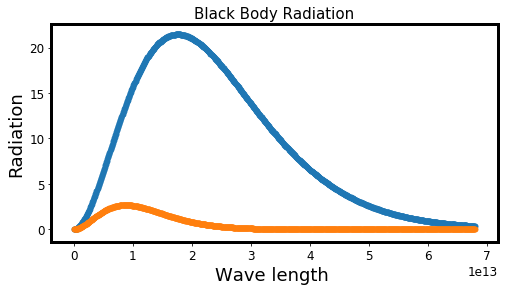

In [0]:
n_s_rate=1

x_label = 'Wave length '
y_label = 'Radiation'
plt_title = 'Black Body Radiation'
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(bbr_data[0][::n_s_rate], 10**20*bbr_data['T'][::n_s_rate])
ax.scatter(bbr_data[0][::n_s_rate], 10**20*bbr_data['T/2'][::n_s_rate])
plt.show()

In [0]:
'''
Exercise:
Find a fit and plot them along side the data. 

- Define X,Y
- Use SVR to find a fit
- Plot it alongside the data
'''
X = bbr_data[0].values.reshape(len(bbr_data),1)
Y = 10**17*bbr_data['T'].values#.reshape(len(bbr_data),1)


In [0]:
%%time
bbr_reg = SVR(kernel='poly')
bbr_reg.fit(X,Y)
print(bbr_reg.score(X,Y) )

-0.055940705257694116
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.47 ms


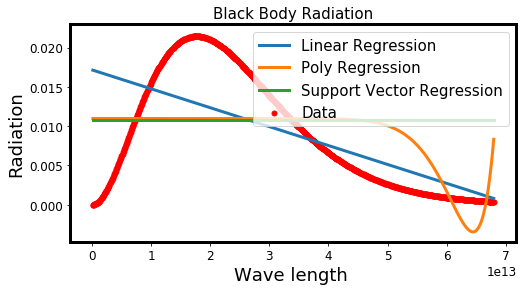

CPU times: user 444 ms, sys: 32 ms, total: 476 ms
Wall time: 255 ms


In [0]:
%%time


bbr_reg_lin = LinearRegression()
bbr_reg_lin.fit( X , Y )


from sklearn.preprocessing import PolynomialFeatures
polytransform = PolynomialFeatures(degree=18 )
bbr_reg_poly = LinearRegression()
bbr_reg_poly.fit(       polytransform.fit_transform( X )      , Y )

from sklearn.svm import SVR
bbr_reg_svr = SVR(kernel='rbf')
bbr_reg_svr.fit(X,Y)
# print(bbr_reg.score(X,Y) )

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(X, bbr_reg_lin.predict( X ) ,label='Linear Regression' )
ax.plot(X, bbr_reg_poly.predict( polytransform.fit_transform(X) ) ,label='Poly Regression' )
ax.plot(X, bbr_reg_svr.predict( X ) ,label='Support Vector Regression' )
ax.scatter(X ,Y, color='r',label='Data' )
ax.legend(loc=1)
plt.show()

## High dimensionality
Another form of complexity is when we are investigating a property of the system that depends or is realted to too many parameters. 
Even if the dependence is linear on each one of them, it still would be challenging to resolve the role that each one of them is playing. 

### Ground state energy of complexy molecules
Here we investigate the ground state enery of moecules. This is in general a challenging problem. Here we use the data from some simulations for different molecules. 
=> Coulomb matrix



In [0]:
import io, requests, zipfile

In [4]:
'''
We need to first import the data. I took the data from kaggle datasets under the physics tag and 
put it in googledrive
'''

url = 'https://www.dropbox.com/s/das9t6vwp7t4b7f/roboBohr.csv.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' , index_col=0)
 
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    
# data = pd.read_csv('roboBohr.csv.zip', compression='zip', index_col=0)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


/home/sraeisi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


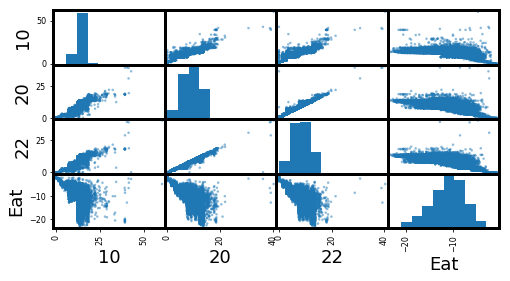

In [0]:
pd.scatter_matrix(data[['10','20','22', 'Eat']])
plt.show()

In [0]:
print(data.columns[-4:])
data.drop('pubchem_id',axis=1, inplace=True)
data.columns[-4:]

Index(['1273', '1274', 'pubchem_id', 'Eat'], dtype='object')


Index(['1272', '1273', '1274', 'Eat'], dtype='object')

In [0]:
Y = data['Eat'].values
X = data.drop('Eat',axis=1).values

In [0]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [0]:
%time
reg1 = LinearRegression(n_jobs=4)
reg1.fit(X,Y)
reg1.score(X,Y)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 38.6 µs


0.9692455799608376

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)

In [0]:
%%time
reg1 = LinearRegression(n_jobs=4)
reg1.fit(X_train,Y_train)
print('The score on the training set is: '+str(reg1.score(X_train,Y_train)) )
print('The score on the test set is: '+str(reg1.score(X_test,Y_test)))

The score on the training set is: 0.9705350601062441
The score on the test set is: -292.5010297992755
CPU times: user 14.9 s, sys: 404 ms, total: 15.3 s
Wall time: 11.3 s


In [0]:
%%time
reg2 = Lasso()
reg2.fit(X_train,Y_train)
print('The score on the training set is: '+str(reg2.score(X_train,Y_train)) )
print('The score on the test set is: '+str(reg2.score(X_test,Y_test)))

The score on the training set is: 0.8250925259752339
The score on the test set is: 0.8310620350483154
CPU times: user 2.55 s, sys: 172 ms, total: 2.72 s
Wall time: 1.96 s


In [0]:
%%time
reg3 = Ridge()
reg3.fit(X_train,Y_train)
print('The score on the training set is: '+str(reg2.score(X_train,Y_train)) )
print('The score on the test set is: '+str(reg2.score(X_test,Y_test)))

The score on the training set is: 0.8250925259752339
The score on the test set is: 0.8310620350483154
CPU times: user 3.68 s, sys: 132 ms, total: 3.81 s
Wall time: 1.97 s


In [0]:
'''
Exercise
Plot these differnt fits/regressions. 
'''

Here are the smallerst elements:[2.86052935e-05 7.34190579e-05 7.99340311e-05 3.03365265e-04
 3.17582364e-04 4.02973200e-04 5.22575125e-04 6.52599647e-04
 7.81635887e-04 1.16500235e-03]
Here are the largest elements:[1.71789079 1.80562    1.85477036 1.87381305 1.87896196 1.91998709
 1.93717865 1.94267572 2.04260712 2.69358561]


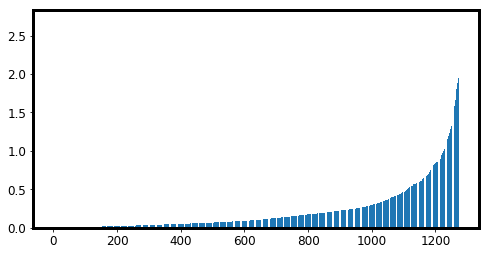

In [0]:
print( 'Here are the smallerst elements:' + str( np.sort( np.abs( reg3.coef_) )[:10] ))
print( 'Here are the largest elements:' + str( np.sort( np.abs( reg3.coef_) )[-10:] ))

plt.bar( range(len(reg3.coef_)) , np.sort(np.abs(reg3.coef_)) )
# plt.bar( np.argsort(np.abs( reg3.coef_)) , np.sort(np.abs(reg3.coef_)) )
plt.show()

In [0]:
# pd.scatter_matrix(data[ np.argsort(np.abs( reg3.coef_))[:3] ])
# plt.show()

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
%%time
reg4 = DecisionTreeRegressor()
reg4.fit(X_train,Y_train)
print( reg4.score(X_test,Y_test) )
print( reg4.score(X_test,Y_test) )

0.9963844678528124
0.9963844678528124
CPU times: user 7.54 s, sys: 32 ms, total: 7.57 s
Wall time: 7.73 s


What if we add noise? How would the polynomial regression work?

# Robustness: What happens if there's a bit of noise?
Let's add some noise to the data, also for simplicity, assume that the noise is gaussian. Let's see what you get!

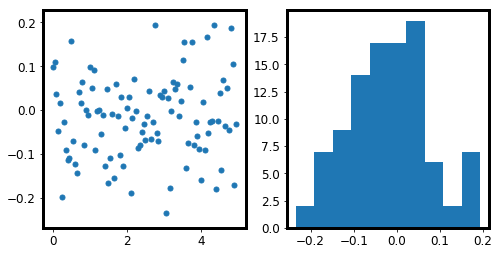

In [0]:
'''
g_noise takes the mean value of the noise, x_0 and 
the variance of the noise, sigma and 
the number of sample points, n_points and 
returns an array of shape (n_points,1)
'''
def g_noise(x0, sigma ,n_points=100):
    return np.random.normal(x0, sigma, size=n_points)


n_s = 100
x = np.arange(0,5,5/n_s).reshape(n_s,1)
noise = g_noise(0,.1,len(x)).reshape(n_s,1)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(x, noise)

ax2.hist(noise)

plt.show()
plt.tight_layout()
plt.close()

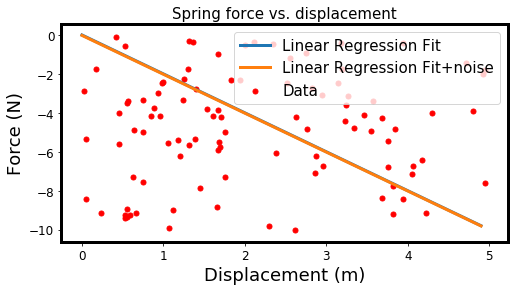

In [0]:
n_s = 100
x_list, noisy_f_list =  spring_F(2,n_samples=n_s)
noisy_f_list += noise

reg2 = LinearRegression()
reg2.fit(x_list, noisy_f_list)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg2.predict( x ) ,label='Linear Regression Fit+noise' )
ax.scatter(x_list , spring_force_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()


# plt.plot(x, reg.predict( x ) , color='b')
# plt.plot(x, reg2.predict( x ) , color='g')
# plt.scatter(x_list , f_list, color='r')
# plt.show()
# plt.close()


Is this always the case?
Under what conditions?

### Noise + complexity
Would the situation be as simple if we had noise on top of a non-linear model?

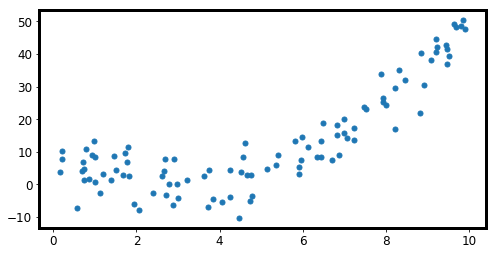

In [0]:
'''
We use the same noise function as before: 
g_noise takes the mean value of the noise, x_0 and 
the variance of the noise, sigma and 
the number of sample points, n_points and 
returns an array of shape (n_points,1)
'''
def g_noise(x0, sigma ,n_points=100):
    return np.random.normal(x0, sigma, size=n_points)


n_s = 100  ## Number of sample points
noise = g_noise(0,5,len(x)).reshape(n_s,1)

'''We generate the data and add the noise to the position measurements. '''
t_list , pos_list = position(2,v=-6,x0=9, t_max=10, n_samples=n_s)
noisy_pos_list = pos_list+noise

plt.scatter(t_list, noisy_pos_list)
plt.show()

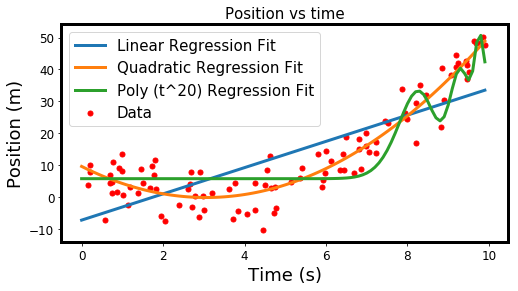

In [0]:
reg_nl = LinearRegression()
reg_nl.fit(t_list, noisy_pos_list)
x = np.arange(0,10,.1).reshape(100,1)

polytransform2 = PolynomialFeatures(degree=2 )
reg_nl2 = LinearRegression()
reg_nl2.fit(       polytransform2.fit_transform(t_list)      , noisy_pos_list)

polytransform20 = PolynomialFeatures(degree=50 )
reg_nl20 = LinearRegression()
reg_nl20.fit(       polytransform20.fit_transform(t_list)      , noisy_pos_list)


fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg_nl2.predict( polytransform2.fit_transform(x) ) ,label='Quadratic Regression Fit' )
ax.plot(x, reg_nl20.predict( polytransform20.fit_transform(x) ) ,label='Poly (t^20) Regression Fit' )
ax.scatter(t_list , noisy_pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

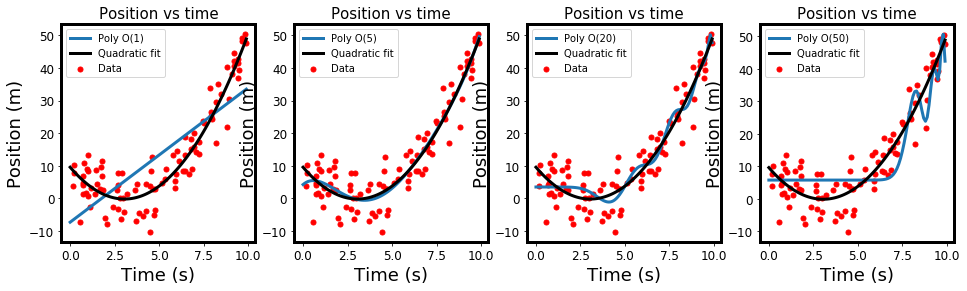

In [0]:
####### Add column to account for different values of sigma
####### Add the information about the score and validation info. 

fig = plt.figure(figsize=(16,4))
degrees = [1, 5, 20, 50]

quad_polytransform = PolynomialFeatures(degree=2 )
reg_quad = LinearRegression()
reg_quad.fit(       quad_polytransform.fit_transform(t_list)      , noisy_pos_list)


for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1, xlabel=x_label, ylabel=y_label, title=plt_title)
    polytransform = PolynomialFeatures(degree = degrees[i] )
    reg = LinearRegression()
    reg.fit(  polytransform.fit_transform(t_list)      , noisy_pos_list)
    
    ax.scatter(t_list , noisy_pos_list, color='r',label='Data' )
    ax.plot(x, reg.predict( polytransform.fit_transform(x) ) ,label='Poly O('+str(degrees[i])+')' )
    ax.plot(x, reg_quad.predict( polytransform2.fit_transform(x) ) ,label='Quadratic fit', color='black')
    ax.legend(loc=0, fontsize = 10)

plt.tight_layout
plt.show()

## Sun

In [0]:
## This data is collected from https://www.pveducation.org/pvcdrom/appendices/standard-solar-spectra
data = pd.read_excel('https://www.pveducation.org/sites/default/files/PVCDROM/Appendices/AM0AM1_5.xls', header=1)
data.head()

In [0]:
plt.plot(data['Wavelength (nm)'], data['Global tilt  W*m-2*nm-1'])
plt.plot(data['Wavelength (nm)'], data['Extraterrestrial W*m-2*nm-1'])
plt.plot(data['Wavelength (nm)'], data['Direct+circumsolar W*m-2*nm-1'])
plt.show()

## Regression
We could use a non-linear model, this brings up several questions. 
Imagine we are given a set of data with different features and our tasks

## Complexity of the model
We could use a non-linear model, this brings up several questions. 
Imagine we are given a set of data with different features and our tasks